In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle, matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
points_bi = [[4.2, 3.5], [5.4, 3.5] ]

savepath = "../../../../../writing/paper2_chaos/opt_phase_shift/images/ss"

def read(filename):
    filehandler = open(filename,"rb")
    results_dict = pickle.load(filehandler)
    filehandler.close()

    return results_dict

In [57]:
filehandler = open("../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_u = boundary_bi[0][62:]
boundary_bi_i_u = boundary_bi[1][62:]
boundary_bi_e_d = boundary_bi[0][:62]
boundary_bi_i_d = boundary_bi[1][:62]

deu = np.zeros(( len(points_bi) ))
ded = deu.copy()
diu = deu.copy()

for j in range(len(points_bi)):
    for ind in range(len(boundary_bi_i_u)):
        if boundary_bi_i_u[ind] == points_bi[j][1]:
            deu[j] = boundary_bi_e_u[ind] - points_bi[j][0]
    for ind in range(len(boundary_bi_i_d)):
        if boundary_bi_i_d[ind] == points_bi[j][1]:
            ded[j] = points_bi[j][0] - boundary_bi_e_d[ind]

    for ind in range(len(boundary_bi_i_u)):
        if np.abs(boundary_bi_e_u[ind]-0.025 - points_bi[j][0]) < 1e-4:
            diu[j] = points_bi[j][1] - boundary_bi_i_u[ind]
        elif np.abs(boundary_bi_e_u[ind]+0.025 - points_bi[j][0]) < 1e-4:
            diu[j] = points_bi[j][1] - boundary_bi_i_u[ind]

    print(ded[j])


0.125
0.125
0.125
0.125
0.5249999999999999
0.5249999999999999
0.5249999999999999
0.9250000000000003
0.9250000000000003
1.3249999999999997


In [3]:
w1_du = read("w1_du.pickle")
w1_ud = read("w1_ud.pickle")
w2_du = read("w2_du.pickle")
w2_ud = read("w2_ud.pickle")

In [6]:
fs_ = 16
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc("xtick", labelsize=fs_)
matplotlib.rc("ytick", labelsize=fs_)
plt.rc("legend", fontsize=fs_)

title_list = [r'down $\rightarrow$ up, $L^1$-cost',
        r'down $\rightarrow$ up, $L^2$-cost',
        r'up $\rightarrow$ down, $L^1$-cost',
        r'up $\rightarrow$ down, $L^2$-cost']

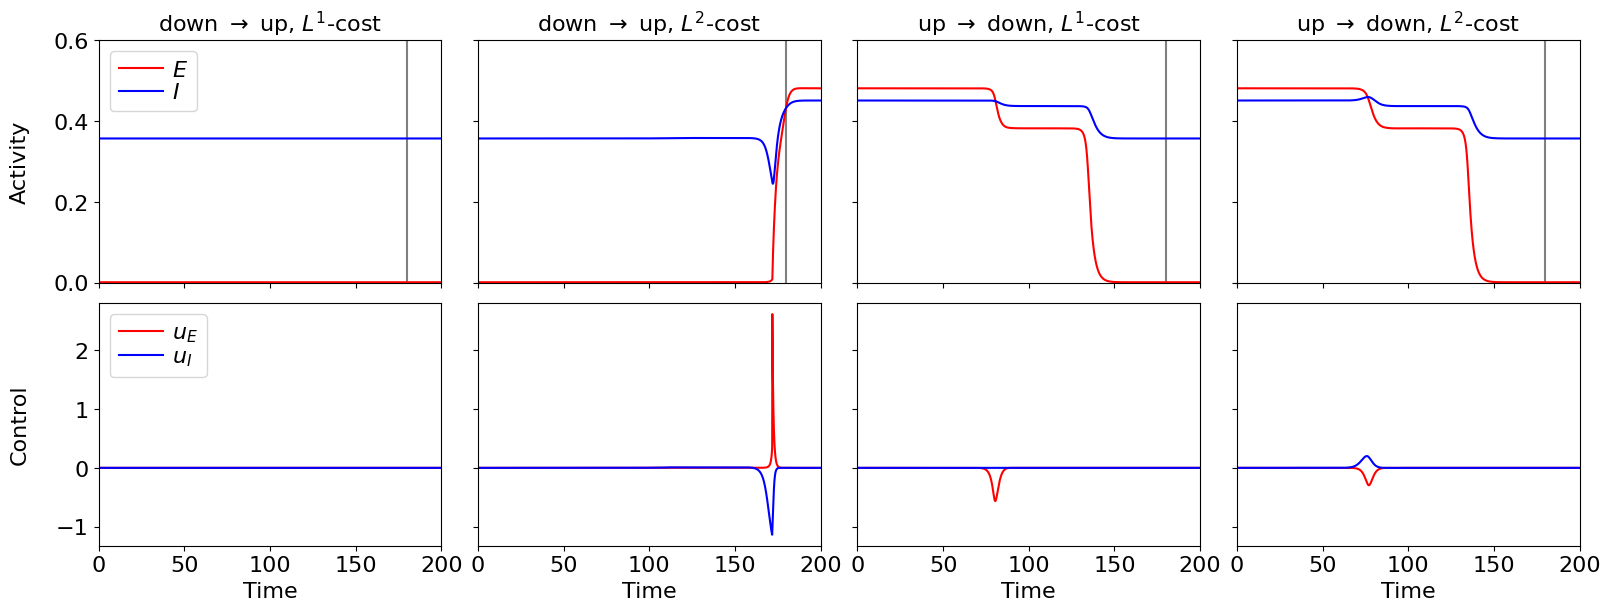

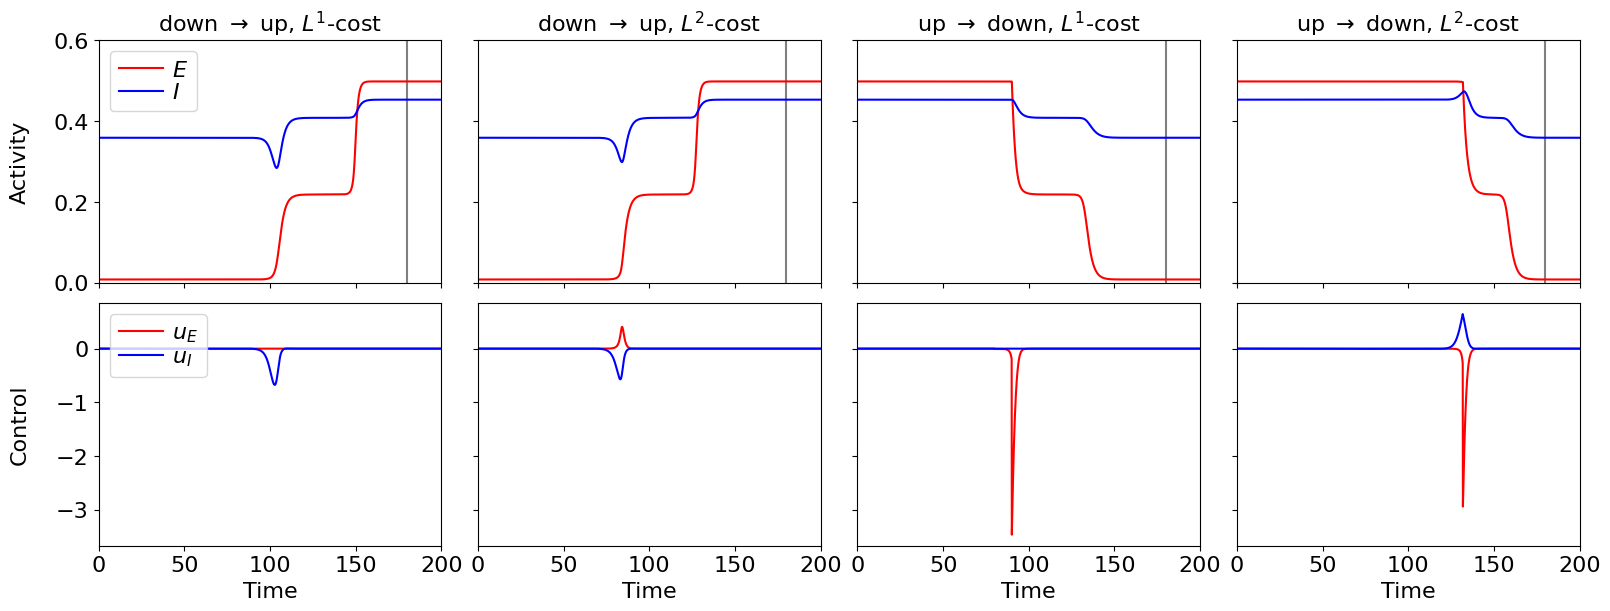

In [7]:
dict_list = [w1_du, w2_du, w1_ud, w2_ud]

duration, dt = 200., 0.1
time = np.arange(0, duration+dt, dt)

for ind_ in range(2):

    fig, ax = plt.subplots(2, 4, figsize=(16, 6), sharey="row", sharex="col", constrained_layout=True)

    for i in range(len(dict_list)):
        ax[0,i].plot(time, dict_list[i]["state"][ind_][0,0,:2001], color="red", label=r"$E$")
        ax[0,i].plot(time, dict_list[i]["state"][ind_][0,1,:2001], color="blue", label=r"$I$")
        ax[1,i].plot(time, dict_list[i]["control"][ind_][0,0,:2001], color="red", label=r"$u_E$")
        ax[1,i].plot(time, dict_list[i]["control"][ind_][0,1,:2001], color="blue", label=r"$u_I$")

        ax[0,i].set_title(title_list[i])

        ax[0,i].set_xlim(0., duration)
        ax[1,i].set_xlim(0., duration)

        #ax[0,i].set_xticks([])
        #ax[1,i].set_xticks(np.arange(0., 201, 50))

        ax[0,i].set_ylim(0., 0.6)
        #ax[1,i].set_ylim(-1., 3.5)

        #if i != 0:
        #    ax[0,i].set_yticks([])
        #    ax[1,i].set_yticks([])
        #else:
        #    ax[0,i].set_yticks(np.arange(0., 0.7, 0.2))
        #    ax[1,i].set_yticks(np.arange(-1., 3.1, 1.))

        ax[1,i].set_xlabel("Time")
        ax[0,i].vlines(180., 0., 0.6, color="grey")

    ax[0,0].legend(loc="upper left", labelspacing=0.1, handletextpad=0.4)
    ax[1,0].legend(loc="upper left", labelspacing=0.1, handletextpad=0.4)

    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")
    ax[0,0].yaxis.set_label_coords(-0.2,0.5)
    ax[1,0].yaxis.set_label_coords(-0.2,0.5)

    plt.savefig(os.path.join(savepath, "traces_" + str(ind_) + "_otherparams.png"))
    plt.show()